In [62]:
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pylab as plt
from livelossplot import PlotLossesKeras


2.13.1


In [63]:
# loading csv dataset for manipulator
model_size = "large"
df = pd.read_csv(f"manipulator_dataset_{model_size}.csv", index_col=False)
df

,x,y,q1,q2
0,2.000000,0.000000e+00,0.0,0.000000
1,1.999875,1.578624e-02,0.0,0.904523
2,1.999502,3.156855e-02,0.0,1.809045
3,1.998879,4.734299e-02,0.0,2.713568
4,1.998007,6.310563e-02,0.0,3.618090
...,...,...,...,...
39995,-0.001993,-6.310563e-02,180.0,176.381910
39996,-0.001121,-4.734299e-02,180.0,177.286432
39997,-0.000498,-3.156855e-02,180.0,178.190955
39998,-0.000125,-1.578624e-02,180.0,179.095477


In [64]:
# creating data and label dataframes and 

features = df.copy()
features.pop("q1")
features.pop("q2")
labels = df.copy()
labels.pop("x")
labels.pop("y")

features = np.array(features)
labels = np.array(labels)

In [65]:
# clean, normalize, and split data
feat_mean = np.mean(features, axis=0)
feat_std = np.std(features, axis=0)
lab_mean = np.mean(labels, axis=0)
lab_std = np.std(labels, axis=0)

train_data, test_data, train_targets, test_targets = train_test_split(features, labels, test_size=0.2)

In [60]:
# build the model
def get_model(wd, rate):
    model = Sequential([
        Dense(512, kernel_regularizer = regularizers.l1_l2(wd, wd), activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(train_targets.shape[1])
    ])
    return model

model = get_model(1e-3, 0.2)

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 512)               1536      
                                                                 
 dense_106 (Dense)           (None, 512)               262656    
                                                                 
 dense_107 (Dense)           (None, 512)               262656    
                                                                 
 dense_108 (Dense)           (None, 512)               262656    
                                                                 
 dense_109 (Dense)           (None, 512)               262656    
                                                                 
 dense_110 (Dense)           (None, 512)               262656    
                                                                 
 dense_111 (Dense)           (None, 512)              

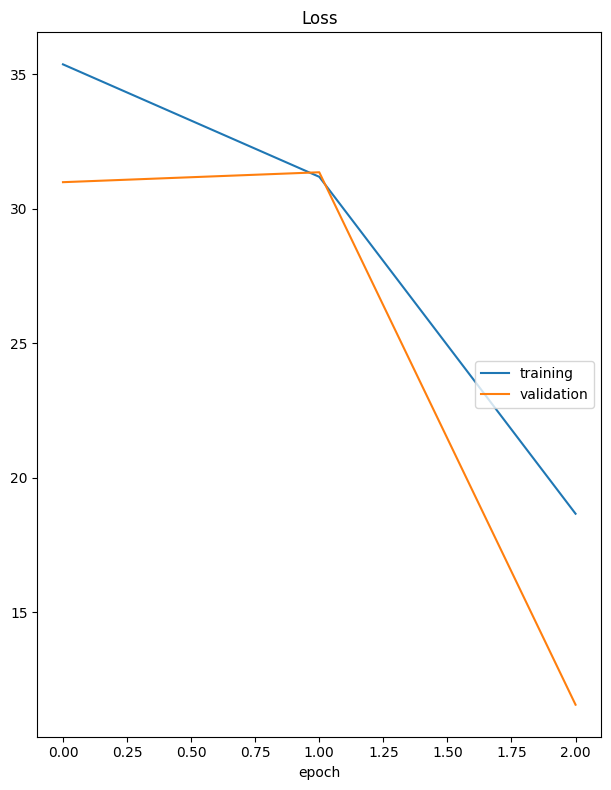

Loss
	training         	 (min:   18.662, max:   35.372, cur:   18.662)
	validation       	 (min:   11.560, max:   31.359, cur:   11.560)
213/213 [==============================] - 7s 34ms/step - loss: 18.6621 - val_loss: 11.5602
Epoch 4/100
 65/213 [========>.....................] - ETA: 4s - loss: 9.1548

KeyboardInterrupt: 

In [61]:
# Define the early stopping object
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=15, mode='min')

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, batch_size=128, validation_split=0.15, verbose=True, callbacks=[early_stopping, PlotLossesKeras()])

In [43]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

250/250 - 1s - loss: 1.5681 - 993ms/epoch - 4ms/step


1.5681278705596924

In [55]:
print(model.predict([[0,2],[2,0],[1,1],[1.4,1.3],[-1,-1]]))

1/1 [==============================] - 0s 36ms/step
[[-0.0009336   0.00074871]
 [-0.00096879  0.00106193]
 [-0.00074563  0.00071145]
 [-0.00096475  0.00089493]
 [-0.00069489  0.0014927 ]]


In [35]:
model.save("invkine_model_large.h5")

/home/beedo/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


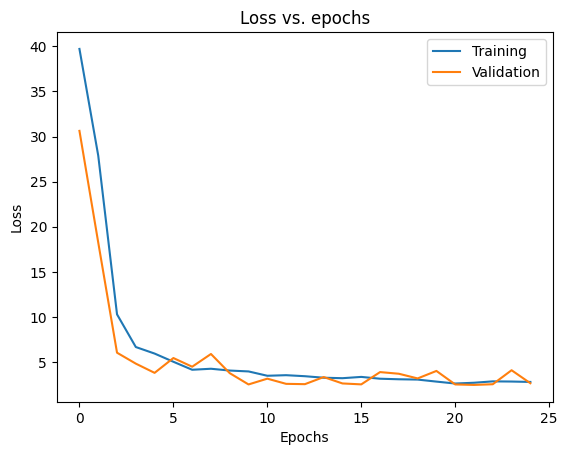

In [36]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [28]:
new_model = tf.keras.models.load_model('invkine_model.h5')

In [29]:
new_model.predict([[0,2],[2,0],[1,1],[1.4,1.3],[0,0],[0,-2]])

1/1 [==============================] - 0s 169ms/step


array([[ 82.52112  ,  10.429477 ],
       [  2.714726 ,   6.4013457],
       [  0.9894364,  94.17665  ],
       [ 37.357098 ,  17.726227 ],
       [ 70.11199  , 182.49486  ],
       [273.69986  , 108.646324 ]], dtype=float32)

In [36]:
print(new_model.predict([[0,2]])[0])

1/1 [==============================] - 0s 36ms/step
82.52113


In [55]:
data = tf.constant([[2,0]])

predictions = np.array(model(data))[0]
print(predictions)

[2.7147245 6.401343 ]
